# Problem Statement

The Advertising dataset captures the sales revenue generated with respect to advertisement costs across multiple channels like radio, tv, 
and newspapers. We will use linear regression to understand how spending on advertisements impact sales.

Questions which can reveal information from the data.

1. Is there a relationship between ads and sales?
2. If so, how strong is the relationship?
3. What type of ads contribute to sales?
4. What is the effect of each ad type has on sales?
5. Given ad spending, can sales be predicted?


Steps:
1. Visualize the relationship among the features and target variable
2. Apply Linear and Multiple Linear Regression
3. Hypothesis testing
4. Feature Selection
5. Handling Categorical predictors

In [1]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_squared_error
from math import sqrt

%matplotlib inline

In [2]:
# load dataset and adding a column name
data = pd.read_csv('Advertising.csv', index_col=0)
data.head()
data.columns = ['TV', 'Radio', 'Newspaper', 'Sales']

In [3]:
data.shape

(200, 4)

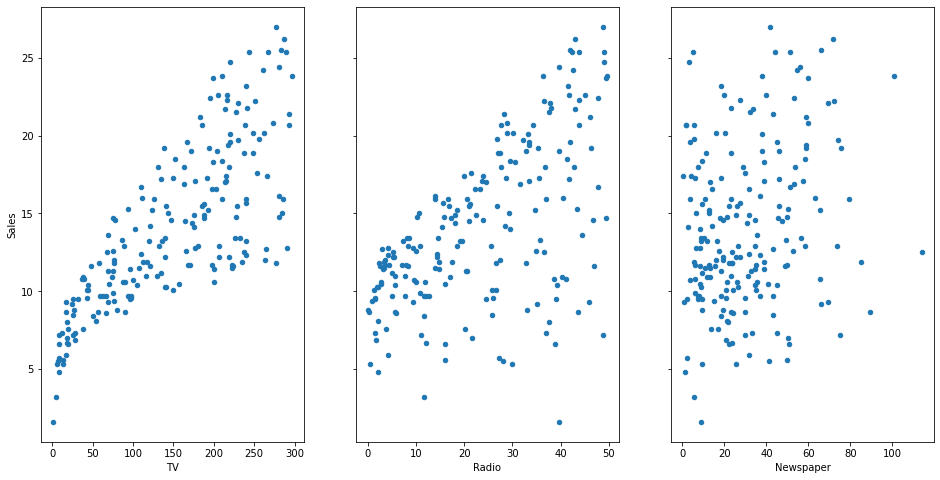

In [4]:
# Visualize the TV, Radio,and Newspaper related to Sales using scatter plot
fig,axs = plt.subplots(1,3,sharey=True)
data.plot(kind='scatter', x='TV', y='Sales', ax=axs[0], figsize=(16,8))
data.plot(kind='scatter', x='Radio', y='Sales', ax=axs[1], figsize=(16,8))
data.plot(kind='scatter', x='Newspaper', y='Sales', ax=axs[2], figsize=(16,8))

In [5]:
# let TV be a feature column to test
feature_cols = ['TV']
X = data[feature_cols]
y = data.Sales

In [6]:
# Applying linear Regression analysis to estimate the relationship for TV and ad spending
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X,y)

LinearRegression()

In [7]:
# using the coefficient and intercept we can use it for the linear equation
print(lm.intercept_)
print(lm.coef_)

7.032593549127693
[0.04753664]


In [8]:
# predicting the smallest and largest value 
X_new = pd.DataFrame({'TV':[data.TV.min(), data.TV.max()]})
X_new.head()

,TV
0,0.7
1,296.4


In [9]:
preds = lm.predict(X_new)
preds

array([ 7.0658692 , 21.12245377])

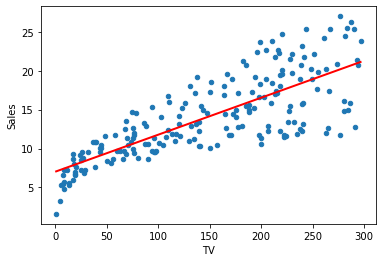

In [10]:
# initializing the scatter plot for TV and Sales
data.plot(kind='scatter', x='TV', y='Sales')
plt.plot(X_new, preds, c='red', linewidth=2)

Looking at the plot we can say that we have a high bias and low variance model.
Using Null Hypothesis let's assure there are no relationship between TV ads and sales.
We will reject the null hypothesis if the 95% confidence interval does not include 0.

In [11]:
# importing statsmodels
!pip install statsmodels 
import statsmodels.formula.api as smf
lm = smf.ols(formula='Sales ~ TV', data=data).fit()

In [12]:
lm.conf_int()

,0,1
Intercept,6.129719,7.935468
TV,0.042231,0.052843


In [13]:
# printing the pvalues, it represents the possibility that the coefficient is actually 0
lm.pvalues

Intercept    1.406300e-35
TV           1.467390e-42
dtype: float64

since the coefficient is less than 0.05 and hence we conclude that there is a relationship between TV ads and Sales

In [14]:
# printing the rsquared value
lm.rsquared

0.611875050850071

In [15]:
# using the three variable to build a model
feature_cols = ['TV', 'Radio', 'Newspaper']
X = data[feature_cols]
y = data.Sales

# train test and split
from sklearn import model_selection
X_train,X_test,y_train,y_test = model_selection.train_test_split(X,y,test_size=0.3,random_state=42)

In [16]:
# applying Linear Regression
lm = LinearRegression()
lm.fit(X,y)
print(lm.intercept_)
print(lm.coef_)

2.9388893694594085
[ 0.04576465  0.18853002 -0.00103749]


In [17]:
lm=LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [18]:
print(lm.intercept_)
print(lm.coef_)

# printing the SMSE
predictions = lm.predict(X_test)
print(sqrt(mean_squared_error(y_test, predictions)))

2.7089490925159048
[0.04405928 0.1992875  0.00688245]
1.9485372043446392


In [19]:
# using the OLS Regression Results we can get the information from the model summary output
lm = smf.ols(formula = 'Sales~TV + Radio + Newspaper', data=data).fit()
lm.conf_int()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Mon, 11 Oct 2021   Prob (F-statistic):           1.58e-96
Time:                        12:10:38   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
Radio          0.1885      0.009     21.893      0.000       0.172       0.206
Newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [20]:
# adding features will increase or change the rsquare
lm = smf.ols(formula='Sales~TV + Radio + Newspaper', data=data).fit()
lm.rsquared

0.8972106381789522

In [21]:
# import numpy and setting a random seed, randomly assign observation to be small or large
import numpy as np
np.random.seed(12345)

nums = np.random.rand(len(data))
mask_large = nums > 0.5

data['Size'] = 'small'
data.loc[mask_large, 'Size'] = 'large'
data.head()

,TV,Radio,Newspaper,Sales,Size
1,230.1,37.8,69.2,22.1,large
2,44.5,39.3,45.1,10.4,small
3,17.2,45.9,69.3,9.3,small
4,151.5,41.3,58.5,18.5,small
5,180.8,10.8,58.4,12.9,large


In [22]:
# creating a dummy variable that represents the category as a binary value
data['Islarge'] = data.Size.map({'small':0, 'large':1})
data.head()

,TV,Radio,Newspaper,Sales,Size,Islarge
1,230.1,37.8,69.2,22.1,large,1
2,44.5,39.3,45.1,10.4,small,0
3,17.2,45.9,69.3,9.3,small,0
4,151.5,41.3,58.5,18.5,small,0
5,180.8,10.8,58.4,12.9,large,1


In [23]:
# adding the Islarge to the feature for preditions
feature_cols = ['TV', 'Radio', 'Newspaper', 'Islarge']
X = data[feature_cols]
y = data.Sales

lm = LinearRegression()
lm.fit(X,y)

zip(feature_cols,lm.coef_)

In [24]:
# being a large market is associated with an average increase in sales of 52.42
# randomly assign area for rural or urban
np.random.seed(123456)

nums = np.random.rand(len(data))
mask_suburban = (nums>0.33) & (nums<0.66)
mask_urban = nums>0.66
data['Area'] = 'rural'
data.loc[mask_suburban, 'Area']='suburban'
data.loc[mask_urban, 'Area']='urban'
data.head()

,TV,Radio,Newspaper,Sales,Size,Islarge,Area
1,230.1,37.8,69.2,22.1,large,1,rural
2,44.5,39.3,45.1,10.4,small,0,urban
3,17.2,45.9,69.3,9.3,small,0,rural
4,151.5,41.3,58.5,18.5,small,0,urban
5,180.8,10.8,58.4,12.9,large,1,suburban


In [25]:
# creating another dummy variable
area_dummies = pd.get_dummies(data.Area,prefix = 'Area').iloc[:,1:]

data=pd.concat([data,area_dummies],axis=1)
data.head()

,TV,Radio,Newspaper,Sales,Size,Islarge,Area,Area_suburban,Area_urban
1,230.1,37.8,69.2,22.1,large,1,rural,0,0
2,44.5,39.3,45.1,10.4,small,0,urban,0,1
3,17.2,45.9,69.3,9.3,small,0,rural,0,0
4,151.5,41.3,58.5,18.5,small,0,urban,0,1
5,180.8,10.8,58.4,12.9,large,1,suburban,1,0


In [26]:
# adding the new variuable to the feature
feature_cols = ['TV', 'Radio', 'Newspaper', 'Islarge', 'Area_suburban', 'Area_urban']
X = data[feature_cols]
y = data.Sales

lm = LinearRegression()
lm.fit(X,y)
print(feature_cols,lm.coef_)

['TV', 'Radio', 'Newspaper', 'Islarge', 'Area_suburban', 'Area_urban'] [ 0.04574401  0.1878667  -0.0010877   0.07739661 -0.10656299  0.26813802]


Considering all the variables as fixed, being in a suburban area is associated with the average decrease in sales of 106.5 as compared to the 
baseline which is rural. Being in an urban area is associated with average increase of sales 268.13 as compared to rural.